# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The No Show Appointment dataset consist of records of patients in brazil and is focused on whether each patient showed up for their medical appointment. Each of the rows consist of information about the patient's ID, Appointment ID, Gender, Date the appointment was scheduled, Date of the Appointment, Neighbourhood they lived, if they are on medical schorlaship, if they suffer from Hypertension, Diabetes, Alcholism or are Handicapped, if they received an SMS prior their appointment and finally, whether they show up or not. 

    The column names are as follows:
    PatientId      Uniquely identifies each patients 
    AppointmentID  Uniquely identifies each appointment made
    Gender         Gender of the patient (M- male, F-Female)
    ScheduledDay   Date patient scheduled an appointment
    AppointmentDay Date of Appointment 
    Age            Age of patient
    Neighbourhood  Neigbhourhood the patient lives   
    Scholarship    Whether the patient is on medical scholarship (1 meaning they are and 0 meaning they aren't) 
    Hypertension   Whether the patient suffer from Hypertension (1 meaning they do and 0 meaning they don't) 
    Diabetes       Whether the patient suffers Diabetes (1 meaning they do and 0 meaning they don't) 
    Alcoholism     Whether the patient suffers Alcoholism (1 meaning they do and 0 meaning they don't) 
    Handicap       Whether the patient is Handicapped (ranges from 0-4)
    SMS_received   Whether the patient received an SMS prior to appointment (1 meaning they received and 0 meaning they didn't) 
    No-show        Whether the patient showed up (No meaning they showed and Yes meaning they didn't) 

### Question(s) for Analysis

1. Does the day of the week the appointment falls affect whether the patient will show up or not?
2. Does the number of days between the scheduled day and appointment day determine whether a patient will show up or not?
3. Does having a medical scholarship affect the possibility of a patient showing up?
4. Do some neighbourhoods get more schorlaship than the other?
5. Does gender affect the possibility of a patient showing up or not?
6. Does Hypertension, Diabetes, Alcoholism or being a handicap affect showing up?
7. Does Age affect the fact that a particular patient shows up/not?
8. Does sending SMS affect showing up?


In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
NoShow_df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv',header=0) #read the file in

In [3]:
NoShow_df.head() #inspecting the dataset

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [4]:
NoShow_df.info() #understanding each of the columns name and the datatype
NoShow_df.nunique() #looking deeper into the unique values of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [5]:
NoShow_df.describe() # statistical description of numerical column

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [6]:
NoShow_df.duplicated().sum() #checking for duplicates

0

First thing to note is that the AppointmentID and PatientId is not useful for this analysis. Second thing is the mismatched datatypes. The dates are strings and some of the columns are incorrectly spelt but luckily, No missing values. 
The nunique() function shows that even though there are 62299 patients, there are about 110527 appointments made which means some patients that actually missed their appointment might have resceduled or some had to come back. It also showed that all the appointments were distributed into 27 days. Lastly, Handicap has 4 levels (0-5).
The describe() function showed the minimum age is -1 which might be an error and no duplicates. 

Now to clean the irregularities

### Data Cleaning

In [7]:
NoShow_df.drop(['PatientId','AppointmentID'],axis=1,inplace=True) #dropping columns that are not needed

In [8]:
NoShow_df[NoShow_df['Age']==-1] 
NoShow_df.drop(99832,axis=0,inplace=True)

Checking the record/records with Age as -1 and since it's just one, it might be a mistake hence, dropping it too. 

In [9]:
NoShow_df['ScheduledDay']=pd.to_datetime(NoShow_df['ScheduledDay'])
NoShow_df['AppointmentDay']=pd.to_datetime(NoShow_df['AppointmentDay'])
NoShow_df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)

Changing the dates type from string to a date object and renaming misspelt column labels. 

In [10]:
NoShow_df.head()

Gender        ScheduledDay AppointmentDay  Age      Neighbourhood  \
0      F 2016-04-29 18:38:08     2016-04-29   62    JARDIM DA PENHA   
1      M 2016-04-29 16:08:27     2016-04-29   56    JARDIM DA PENHA   
2      F 2016-04-29 16:19:04     2016-04-29   62      MATA DA PRAIA   
3      F 2016-04-29 17:29:31     2016-04-29    8  PONTAL DE CAMBURI   
4      F 2016-04-29 16:07:23     2016-04-29   56    JARDIM DA PENHA   

   Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMS_received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   
2            0             0         0           0         0             0   
3            0             0         0           0         0             0   
4            0             1         1           0         0             0   

  No-show  
0      No  
1      No  
2      No  
3      No  
4      No

#### Now to answer all the questions!

<a id='eda'></a>
## Exploratory Data Analysis

### 1. Does the day of the week the appointment falls affect whether the patient will show up or not?

In [11]:
NoShow_df['Weekday']=NoShow_df['AppointmentDay'].dt.day_name() #creating a new column that has each day the date falls;

Enter YlabelCount of patients
Enter chart titleCount of Show/No-Show by Appointment weekdays


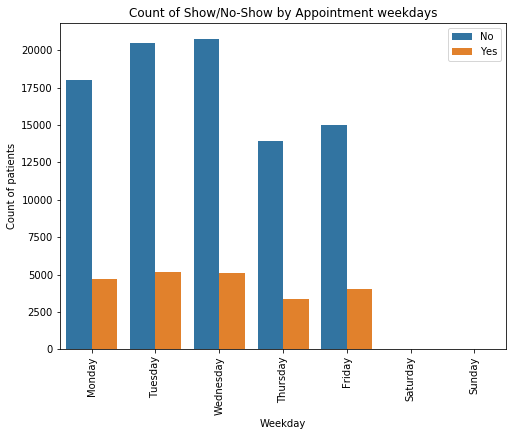

In [24]:
#function to plot a count plot since I might be needing it alot during the analysis. 
def plot_countplot(x,figsize,hue=None,day=None):
    plt.figure(figsize=figsize)
    ylabel=input('Enter Ylabel')
    title=input('Enter chart title')
    sns.countplot(x=x,data=NoShow_df,hue=hue,order=day)
    sns.color_palette("Paired")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.xticks(rotation=90)
plot_countplot('Weekday',(8,6),'No-show',day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

The chart shows the number of people that show up varies through the week. Alot of people were scheduled to have more appointments on Wednesdays and Tuesdays. This might have led to them having higher number of people showing up. There is a tiny bar showing on saturday which means some patients had appointment on the day but they were really small. I'll have a closer look on the dataset now. 

In [13]:
len(NoShow_df[NoShow_df['Weekday']=='Saturday']) #number of people that had their appointment on Saturday

39

In [14]:
len(NoShow_df[NoShow_df['Weekday']=='Sunday']) #number of people that had their appointment on Sunday

0

There are few people who had their appointments on Saturday afterall. None on sunday. Now, let's plot a chart that shows the percentage of patients that showed up out of the total appointment made in each day

In [15]:
#create a function that calculates percentage of people that show out of all those that have appointment by a given column
def percentage(column):
    weekday_perc = NoShow_df[NoShow_df['No-show'] == 'No'].groupby([column]).size()/NoShow_df.groupby([column]).size()
    return weekday_perc

Enter YlabelPercentage of Patients
Enter chart titlePercentage of Show per Weekday


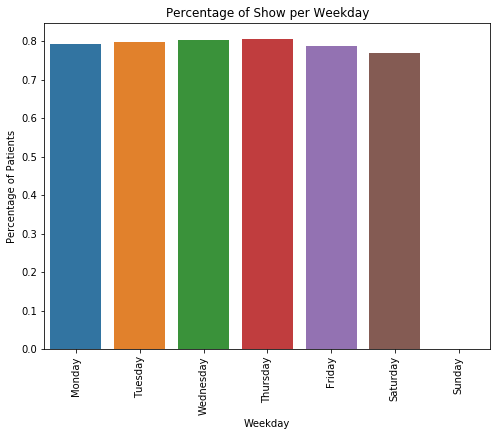

In [16]:
def plot_barplot(x,y,figsize,day=None):
    plt.figure(figsize=figsize)
    ylabel=input('Enter Ylabel')
    title=input('Enter chart title')
    sns.barplot(x=x, y=y,order=day)
    sns.color_palette("Paired")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
plot_barplot(percentage('Weekday').index,percentage('Weekday'),(8,6),day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

Every of the weekdays have up to 80% of the patients showing up. Only Saturday have less than 80% which means weekdays is a feature that will be useful in predicting if a patient will show up or not. (lesser people on weekends)

### 2. Does the number of days between the scheduled day and appointment day determine whether a patient will show up or not?

In [17]:
#checking if the difference between appointment day and scheduled day is negative. In cases that they are, then switch since it 
#must have been a mistake.
NoShow_df['AppointmentDay'] = np.where((NoShow_df['AppointmentDay'] - NoShow_df['ScheduledDay']).dt.days < 0, NoShow_df['ScheduledDay'], NoShow_df['AppointmentDay'])


In [18]:
#Creating a difference column that shows number of days between Appointment day and Scheduled day
NoShow_df['Difference']=(NoShow_df['AppointmentDay']-NoShow_df['ScheduledDay']).dt.days

In [19]:
plot_countplot('Difference',(20,6)) #calling the count plot functions

Enter YlabelCount of Patients
Enter chart titleCount of Patients by Waiting days


More than 40000 patients were scheduled to the same day and the remaining few spread accross the remaining days with very few allocated to days after a month. I'll look further into it to know the percentage of each patients that showed up.

In [20]:
plot_barplot(percentage('Difference').index,percentage('Difference'),(16,8))

Enter YlabelPercentage of Patients
Enter chart titlePercentage of Patients by Waiting days


This showed even though more than 40000 people were scheduled to the same day, More than 90% of them showed up. There is also a relatively consistent pattern till after a week. After then, there hasn't been a constant pattern. Still, the number of waiting days is an important feature because people tend to show up if the waiting day fall within a week the schedule was made. 

### 3. Does having a medical scholarship affect the possibility of a patient showing up?

Enter YlabelCount of Patients
Enter chart titleCount of Show/No-Show by scholarship


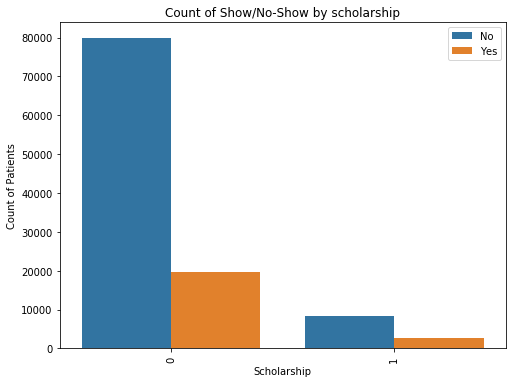

In [21]:
plot_countplot('Scholarship',(8,6),'No-show',)

Most of those with scholarship tend to show up more but it has the same pattern with those without scholarship. I'll look deeper into the number of people that showed up to see if there is a difference. 

Enter YlabelPercentage of Patience
Enter chart titlePercentage of Show by Scholarship


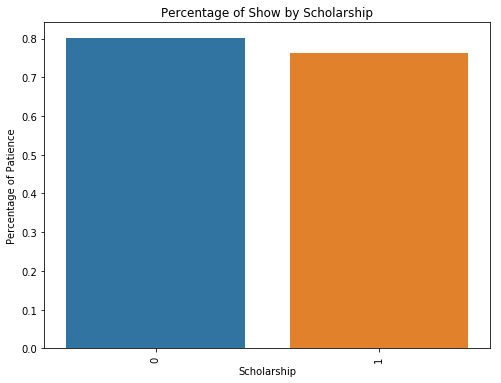

In [22]:
plot_barplot(percentage('Scholarship').index,percentage('Scholarship'),(8,6))

80% of those without medical scholarship showed up and about 75% of those with medical showed up. This showed Scholarship is a useful column in predicting if a person will show up or not. 

### 4. Do some neighbourhoods get more schorlaship than the other?

Enter YlabelScholarship
Enter chart titlePercentage of Neighborhood with Scholarships


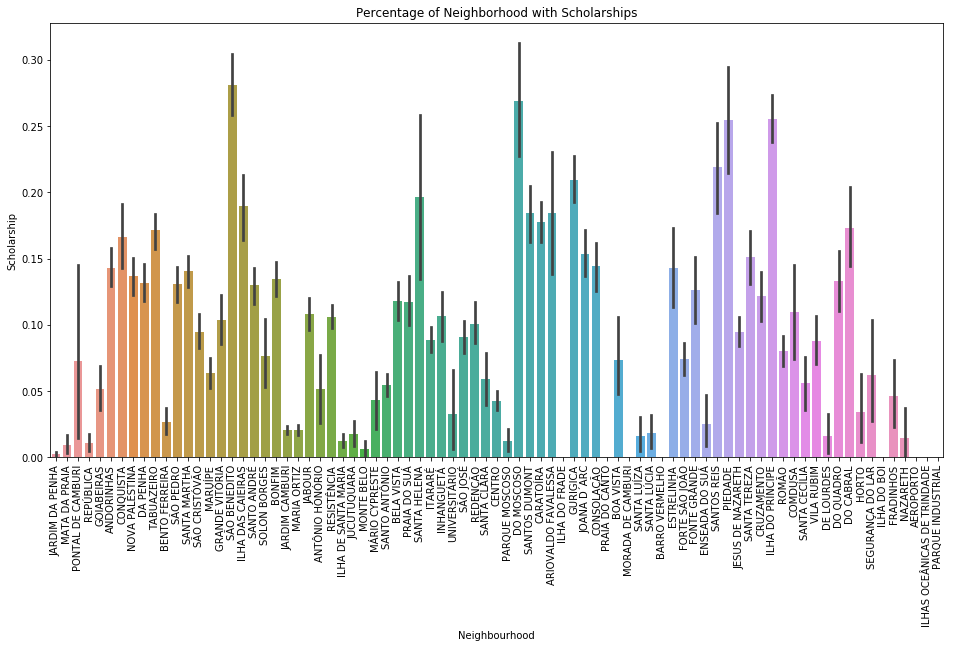

In [30]:
plot_barplot(NoShow_df['Neighborhood'],NoShow_df['Scholarship'],(16,8))

Some Neigbourhood tend to be awarded more scholarships than the other. Does this affect them showing up or not?

Enter YlabelCount of Patients
Enter chart titleCount of Patients by Neighbourhood


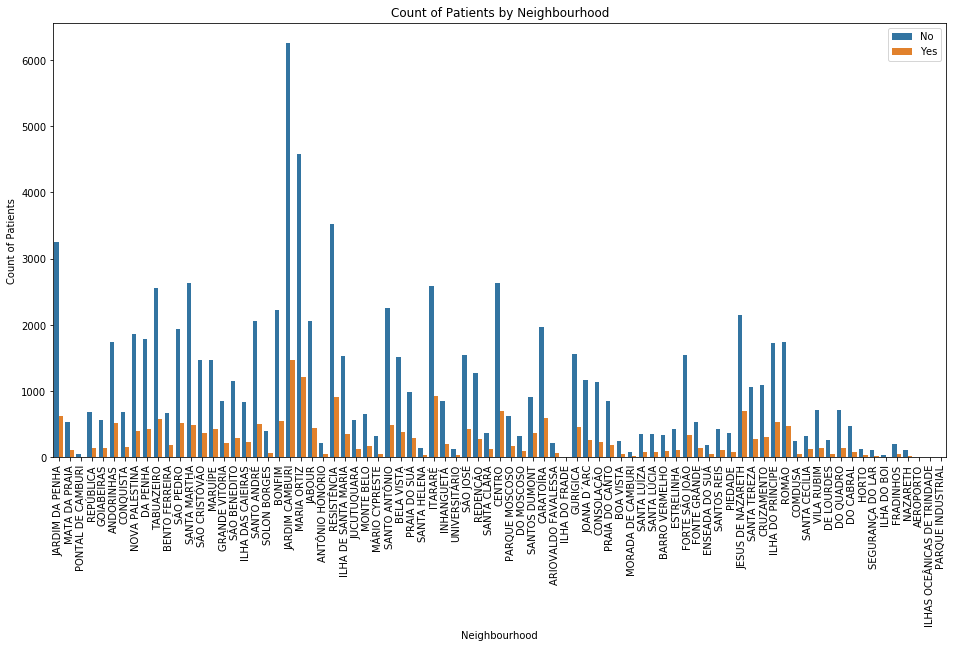

In [31]:
plot_countplot('Neighbourhood',(16,8),'No-show')

Enter YlabelPercentage of patients
Enter chart titlePercentage of Show by Neighbourhood


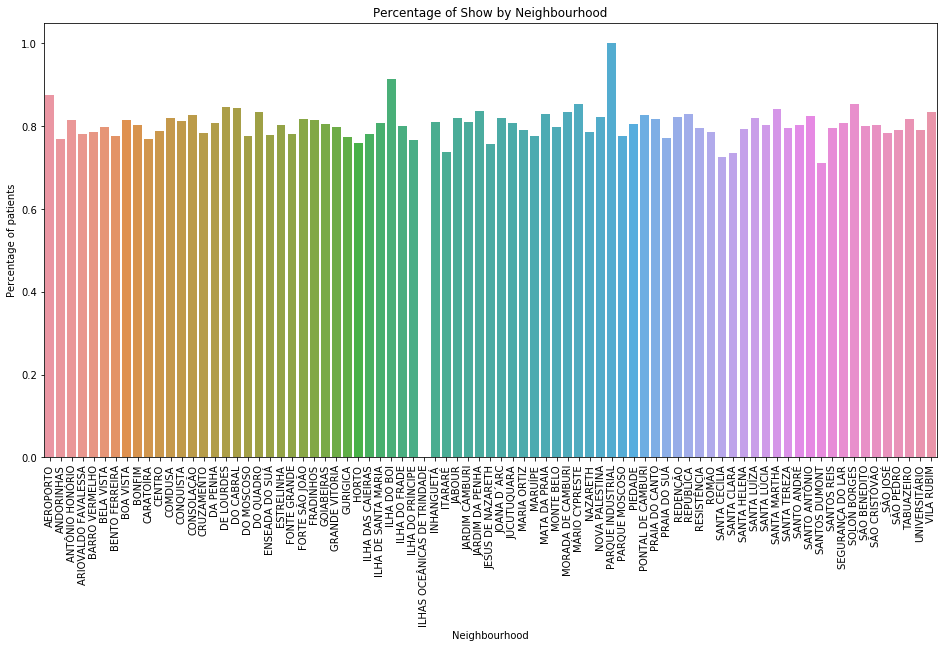

In [32]:
plot_barplot(percentage('Neighbourhood').index,percentage('Neighbourhood'),(16,8))

Even though I thought location might be a factor since some neighborhood might be far from the hospital, it isn't. Some of the neigbourhoods were offered scholarships more than the other but it didn't affect those showing up or not. Looking at the percentage of those that showed by each neighbourhood, All neigbourhoods had more than 80% of their patients showing up. Those that reached 100 had just a few patients that scheduled in the first place. Therefore, Neighbourhood isn't really a useful feature in prediction. 

### 5. Does gender affect the possibility of a patient showing up or not?

Enter YlabelCount of Patients
Enter chart titleCount of Show/No-Show by Gender


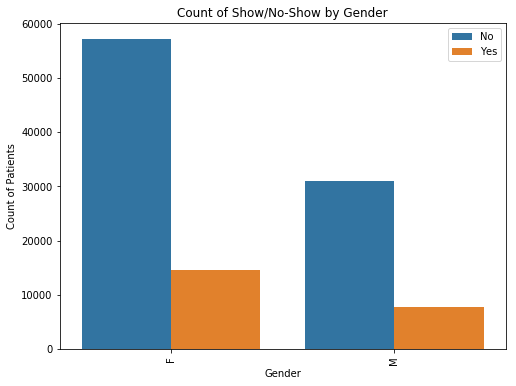

In [39]:
plot_countplot(NoShow_df['Gender'],(8,6),'No-show')

It appears that most of the customers are made up of Women but this doesn't determine they show up more. I'll look further into it.  

Enter YlabelPercentage of patients
Enter chart titlePercentage of Show by Gender


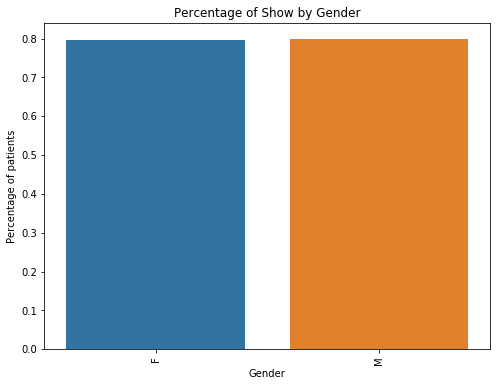

In [41]:
plot_barplot(percentage('Gender').index,percentage('Gender'),(8,6))

There seem to be no difference and as such Gender isn't a useful feature in prediction if a patient shows up or not. 

### (Bonus Question) Does a particular gender get more schorlaships than the other?

Enter YlabelPercentage of patients with Scholarship
Enter chart titlePercentage of Scholarships by Gender


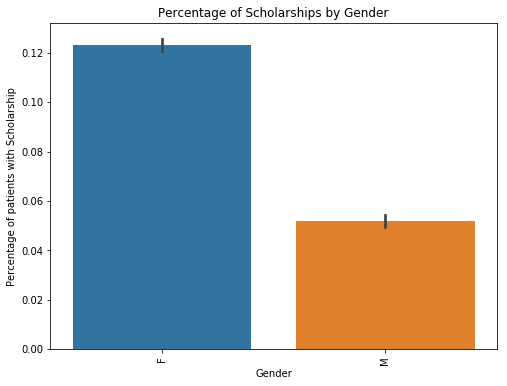

In [33]:
plot_barplot(NoShow_df['Gender'],NoShow_df['Scholarship'],(8,6))

More females are awarded scholarships. It might be because most of the patients are females/kids(who likely came with thier mother).

### 6. Does Hypertension, Diabetes, Alcoholism or being a handicap affect showing up?

I'm going to dive into checking the percentage of people that show and has the illness vs those who show and didn't have the illness. 

Enter YlabelPercentage of Patients
Enter chart titlePercentage of Show by Diabetes


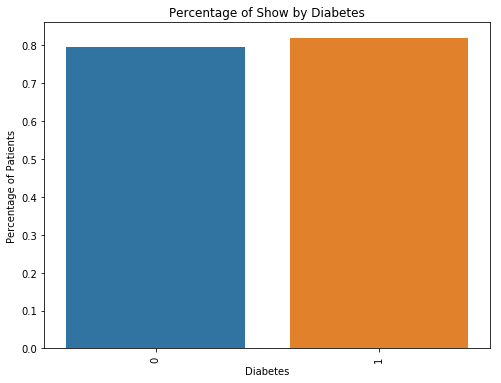

In [42]:
plot_barplot(percentage('Diabetes').index,percentage('Diabetes'),(8,6))

Apparently, those that have diabetes tend to show up more than those who didn't. This means the Diabetes column is useful in predicting if a patient will show up or not. 

Enter YlabelPercentage of Patients
Enter chart titlePercentage of Show by Alcoholism


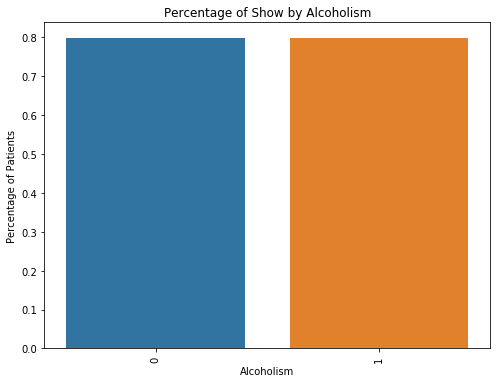

In [43]:
plot_barplot(percentage('Alcoholism').index,percentage('Alcoholism'),(8,6))

Most people with Alcoholism showed up, this means it is a useful feature in predicting if a patient will show up or not. 

In [44]:
plot_barplot(percentage('Hypertension').index,percentage('Hypertension'),(8,6))

Enter YlabelPercentage of Patients
Enter chart titlePercentage of Show by Hypertension


Again, More people with Hypertension tend to show up more than those without. This means the Hypertension column is a useful feature for predicting if a patient will show. 

Enter YlabelPercentage of Patients
Enter chart titlePercentage of Show by Handicap


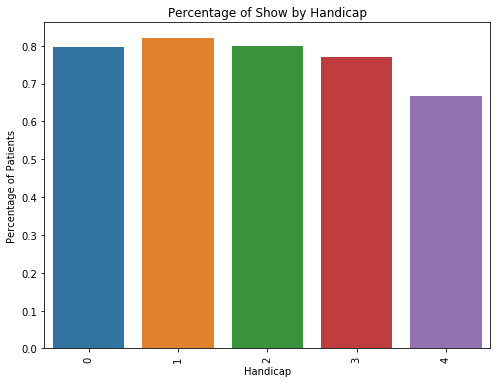

In [45]:
plot_barplot(percentage('Handicap').index,percentage('Handicap'),(8,6))

The chart shows people with handicap show up more than people without. Hence it is a useful feature in predicting if a person
would show up or wouldn't. Another insight is that people with 4th degree Handicap tend to show up less. I think this is cause the illness might have made them immobile and they couldn,t come themselves. 

### (Bonus Question) Does Age have anything to do with scholarship and if so, does it affect showing up?

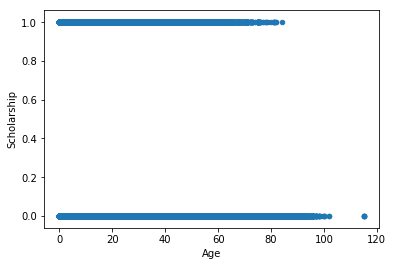

In [24]:
df.plot(x='Age',y='Scholarship',kind='scatter')

The scatter plot showed people 90 years and above where not given scholarships but there seem to be no pattern to how the scholarships were given

### 7. Does Age affect the fact that a patient show up or not?

Text(0.5,0,'Age')

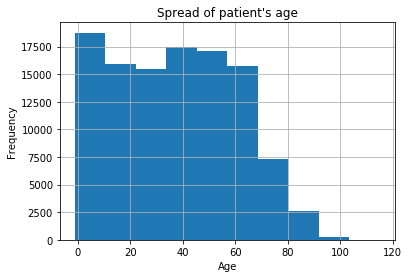

In [10]:
NoShow_df.hist('Age')
plt.title("Spread of patient's age")
plt.ylabel('Frequency')
plt.xlabel('Age')

This shows most of the patients are kids then, middle aged adults with old people being very few. 

Enter YlabelPercentage of patients
Enter chart titlePercentage of Show by Age


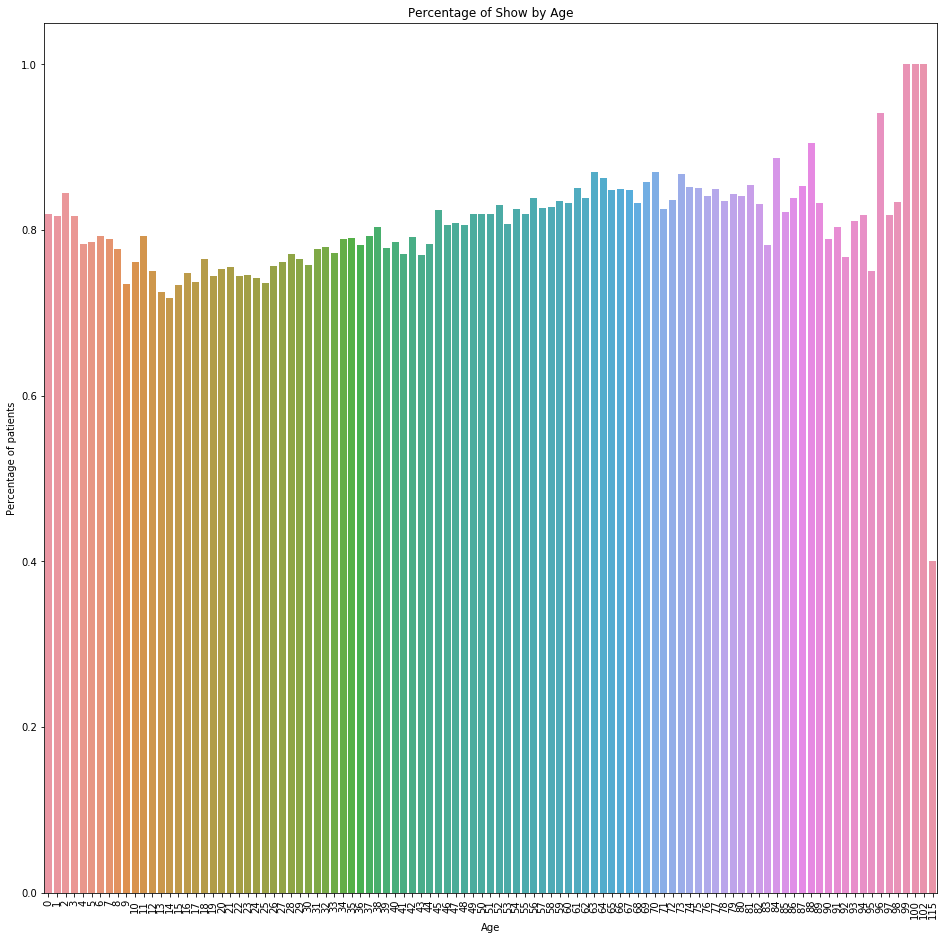

In [25]:
plot_barplot(percentage('Age').index,percentage('Age'),(16,16))

It seems Age isn't a really useful feature in predicting if a person would show up or not because there doesn't seem to be a pattern as to how they show up

### 8. Does SMS affect if someone would show up or not?

Enter YlabelPercentage of patients
Enter chart titlePercentage of Show by SMS received


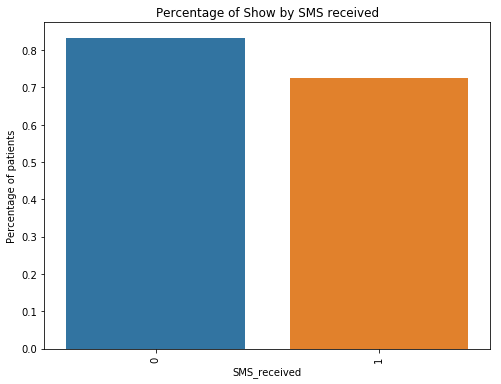

In [27]:
plot_barplot(percentage('SMS_received').index,percentage('SMS_received'),(8,6))

According to this chart, SMS doesn't help as much as I thought it would. Probably, they are SMS sent same day because SMS sent close to day of appointment should remind and hence lead to more return. Due to this confusion, I can't determine if SMS is a useful feature or not. 

<a id='conclusions'></a>
## Conclusions

Features like whether a patient suffer from Diabetes, Hypertension, Alcoholism or is a Handicap, if they have a scholarship, the waiting days between the scheduled day and appointment day and the weekday of the appointment day will be very useful in predicting if a patient will show up or not. Further research can be on building a model to make the predictions.  

The SMS column was a bit confusing and this affected me making a conclusion on whether it is a useful for the analysis or not. Some of the columns were interpreted best to my knowledge too and this is a limitation as I do not have clear understanding of some of the data. An example is the handicap column which ranges from 0-4. I know 0 stands for Not a handicap but to what degree is 1-4? I interpreted it best to my knowledge. 


In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0